In [1]:
# Load C4 and C4 error:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%pylab inline
n=36;m=10;a=1.#05
J=169
import numpy as np
import csv

corr_factor = 1.#1198006/1e7
data_root='../../BOSS_DR12_Data/v10/gosling/'#'../../BOSS DR12 Data/'
file_root_jack=data_root+'CovMatricesJack/'#'../GoslingSphere/Jack/'#CovMatricesJack/'#_good/'
file_root_all=data_root+'CovMatricesAll/'#_good/'../GoslingSphere/All/'
rr_true_file =data_root+'weight_files/binned_pair_counts_n%d_m%d_j%d.dat'%(n,m,J)
weights_file = data_root+'weight_files/jackknife_weights_n%d_m%d_j%d.dat'%(n,m,J)
counts_file = data_root+'CovMatricesAll/total_counts_n%d_m%d.txt'%(n,m)

weights=np.loadtxt(weights_file)[:,1:]
total_counts = np.loadtxt(counts_file)

Populating the interactive namespace from numpy and matplotlib


In [3]:
N_pairs,N_triples,N_quads=total_counts

In [4]:
def read_RR_all(n,m,file_root,string='full'):
    rrfile=file_root+'RR_n%d_m%d_%s.txt' %(n,m,string)
    rr_est = np.loadtxt(rrfile)*corr_factor**2.
    rr_true = np.loadtxt(rr_true_file)
    return rr_est, rr_true

def read_cj_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2j_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3j_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4j_n%d_m%d_%s.txt' %(n,m,string)
    cxfile=file_root+'cxj_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4errj_n%d_m%d_%s.txt' %(n,m,string)
    errc3file=file_root+'c3errj_n%d_m%d_%s.txt' %(n,m,string)
    errcxfile=file_root+'cxerrj_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))*corr_factor**2.
    c3=np.loadtxt(c3file)*corr_factor**3.
    c4=np.loadtxt(c4file)*corr_factor**4.
    cx=np.loadtxt(cxfile)*corr_factor**4.
    errc4=np.loadtxt(errc4file)*corr_factor**8.
    errc3=np.loadtxt(errc3file)*corr_factor**6.
    c3=(c3+c3.T)/2.
    c4=(c4+c4.T)/2.
    cx=(cx+cx.T)/2.
    errc3=(errc3+errc3.T)/2.
    errc4=(errc4+errc4.T)/2.
    c_tot=c4+a**2.*c2+a*c3+cx
    return c2,c3,c4,cx,errc3,errc4,c_tot

def read_c_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4err_n%d_m%d_%s.txt' %(n,m,string)
    errc3file=file_root+'c3err_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))*corr_factor**2.
    c3=np.loadtxt(c3file)*corr_factor**3.
    c4=np.loadtxt(c4file)*corr_factor**4.
    errc4=np.loadtxt(errc4file)*corr_factor**8.
    errc3=np.loadtxt(errc3file)*corr_factor**6.
    c3=(c3+c3.T)/2.
    c4=(c4+c4.T)/2.
    errc4=(errc4+errc4.T)/2.
    errc3=(errc3+errc3.T)/2.
    c_tot=c4+a**2.*c2+a*c3
    return c2,c3,c4,errc3,errc4,c_tot

In [5]:
c2,c3,c4,c3err,c4err,cT=read_c_all(n,m,file_root_all,a)
c2j,c3j,c4j,cxj,c3jerr,c4jerr,cjT=read_cj_all(n,m,file_root_jack,a)

## N_eff from 2016 paper

In [8]:
N_bins=len(cT)
prec=np.linalg.inv(cT)
samples=[]
for a in range(int(0.3*len(cT)),len(cT)): # use large a bin
    for b in range(int(0.7*len(cT))): # use small b bin
        if prec[a,a]<=0.:
            continue # remove errors
        if prec[b,b]<=0.:
            continue
        samples.append(prec[a,b]/np.sqrt(prec[a,a]*prec[b,b]))
N_eff_av = N_bins+1./np.var(samples)

In [9]:
N_eff_av

669.4584261712281

### New Ross suggestion

In [10]:
bin3=np.loadtxt(data_root+'CovMatricesAll/binct_c3_n36_m10_full.txt')
bin2=np.loadtxt(data_root+'CovMatricesAll/binct_c2_n36_m10_full.txt')
bin4=np.loadtxt(data_root+'CovMatricesAll/binct_c4_n36_m10_full.txt')

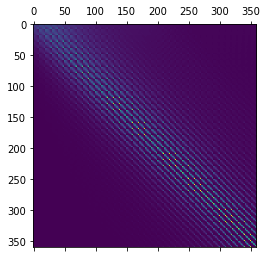

In [11]:
plt.matshow(bin3)#,vmin=-1e-30,vmax=1e-30);plt.colorbar()

In [12]:
N_eff3=np.zeros_like(c3)
for a in range(len(c3)):
    for b in range(len(c3[a])):
        top=c3[a,a]*c3[b,b]+c3[a,b]**2.
        var = (c3err[a,b]-c3[a,b]**2.)/(N_triples-1.)
        N_eff3[a,b]=top/var

In [13]:
N_eff=np.zeros_like(c4)
for a in range(len(c4)):
    for b in range(len(c4[a])):
        top=c4[a,a]*c4[b,b]+c4[a,b]**2.
        var = (c4err[a,b]-c4[a,b]**2.)/(N_quads-1.)
        N_eff[a,b]=top/var

(array([2.7000e+01, 2.4600e+02, 2.6330e+03, 1.6807e+04, 3.8418e+04,
        3.8271e+04, 2.1840e+04, 9.0420e+03, 2.0560e+03, 2.6000e+02]),
 array([6.22053898, 6.46593107, 6.71132317, 6.95671526, 7.20210735,
        7.44749944, 7.69289154, 7.93828363, 8.18367572, 8.42906782,
        8.67445991]),
 <a list of 10 Patch objects>)

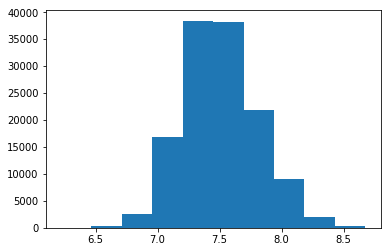

In [14]:
plt.hist(np.log10(N_eff.ravel()))

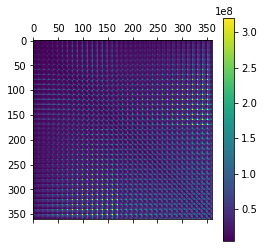

In [15]:
NN=N_eff
plt.matshow(NN,vmax=np.percentile(NN.ravel(),99.9),vmin=np.percentile(NN.ravel(),0.1))
plt.colorbar();